# ENTREGA #1 DEL PROYECTO

### Luisa Fernanda Hernandez Serrato , Laura Daniela Hurtado Davila y Natalia Pedraza Bastidas

### Visualización para ciencia de datos con python


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

Esta base de datos muestra la evolución de la pandemia de COVID-19 en Castilla y León, una comunidad autonoma en España, esta evolución se muestra en las diferentes gerencias del territorio así como en los centros de salud de estas gerencias diariamentes desde el 29 de febrero del 2020 hasta el 10 de marzo del 2021, día cuando se descargo la base.

Estos datos se obtubieron de los datos abiertos de la Junta de Castilla y León, se pueden descargar [en este link](https://analisis.datosabiertos.jcyl.es/explore/dataset/tasa-enfermos-acumulados-por-areas-de-salud/table/?disjunctive.zbs_geo&sort=-fecha).  

In [3]:
df_TEAAS = pd.read_csv('tasa-enfermos-acumulados-por-areas-de-salud.csv', 
                 sep = ';',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Nit Entidad': str
                 })
df_TEAAS.head()

,FECHA,GERENCIA,NOMBREGERENCIA,CS,CENTRO,TOTALENFERMEDAD,TSI,TASAx100,x_geo,y_geo,zbs_geo,TOTALENFERMEDAD_7DIAS,TASAx100_7DIAS,TOTALENFERMEDAD_14DIAS,TASAx100_14DIAS,PROVINCIA,TIPO_CENTRO,PCR_REALIZADOS,TASAx100_PCR_REALIZADOS,PCR_POSITIVOS,TASAx10000_PCR_POSITIVOS,PCR_POSITIVOS_SINTOMAS,TASAx10000_PCR_POSITIVOS_SINTOMAS,PCR_POSITIVOS_SINTOMAS_7DIAS,TASAPCR_POSITIVOS_SINTOMASx10000_7DIAS,PCR_POSITIVOS_SINTOMAS_14DIAS,TASAPCR_POSITIVOS_SINTOMASx10000_14DIAS,SOSPECHA_TRANSMISION_COMUNITARIA,Posición,MUNICIPIO
0,2021-03-10,1701,Gerencia de Ávila,170112,C.S. FONTIVEROS,0,2464,0.000000,-5.002617,40.922458,FONTIVEROS,0.0,0.000000,1.0,0.040584,Ávila,Rural,0,0.000000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,NaN,"40.9224581,-5.0026168",CABEZAS DEL POZO/CRESPOS/FLORES DE AVILA/FUENT...
1,2021-03-10,1701,Gerencia de Ávila,170116,C.S. MOMBELTRAN,0,2985,0.000000,-4.996585,40.276448,MOMBELTRAN,0.0,0.000000,0.0,0.000000,Ávila,Rural,1,0.033501,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,NaN,"40.2764479,-4.996585",MOMBELTRAN/SAN ESTEBAN DEL VALLE/SANTA CRUZ DE...
2,2021-03-10,1701,Gerencia de Ávila,170117,C.S. PIEDRAHITA,0,4674,0.000000,-5.308102,40.542362,PIEDRAHITA,4.0,0.085580,7.0,0.149765,Ávila,Rural,5,0.106975,0,0.0,0,0.0,3.0,6.418485,5.0,10.697475,NaN,"40.5423616,-5.308102",AREVALILLO/CASAS DEL PUERTO/MARTINEZ/MESEGAR D...
3,2021-03-10,1701,Gerencia de Ávila,170121,C.S. MUÑICO,0,1195,0.000000,-5.100693,40.706767,MUÑICO,0.0,0.000000,0.0,0.000000,Ávila,Rural,0,0.000000,0,0.0,0,0.0,0.0,0.000000,0.0,0.000000,NaN,"40.706767,-5.1006928",CABEZAS DEL VILLAR/GALLEGOS DE SOBRINOS/MANJAB...
4,2021-03-10,1702,Gerencia de Burgos,170201,C.S. ARANDA NORTE,2,19902,0.010049,-3.655508,41.689122,ARANDA NORTE,7.0,0.035172,16.0,0.080394,Burgos,Rural,5,0.025123,0,0.0,0,0.0,2.0,1.004924,5.0,2.512310,NaN,"41.6891216,-3.6555077",ARANDA DE DUERO


In [4]:
print('SECOP')
print('Filas: ', df_TEAAS.shape[0])
print('Columnas: ', df_TEAAS.shape[1])

SECOP
Filas:  92872
Columnas:  30


### Abstraer ¿Qué? 

    ¿Qué?

Este data set tiene un total de 92872 items con 30 atributos, el primer atributo es la fecha que expresa temporalidad, esta en el formato año, mes, día. Los atributos de Gerencia, Nombre de gerencia y provincia son categóricos al igual que el código del centro y el centro médico, zbs_geo es un atributo categórico que da el nombre de el municipio donde se encuentra el centro médico. 

El total de enfermedad es un atributo ordenado cuantitativo. El atributo TSI describe la población de castilla y León con acceso al sistema público de salud por cada uno de los centros de salud de las gerencias, este datos se repite cada vez que se repite el centro de salud el dato se repite, por lo tanto es un atributo ordenado ordinal.

Los atributos x_geo, y_geo y posición son los únicos atributos de posición del data set. El atributo de tipo de centro es un atributo categórico que dice si el centro médico se encuentra en una ubicación rural o urbana. El resto de variables son atributos ordenados cuantitativos, que se encargan de contar el número de enfermos en el centro médico, el número de puebas PCR realizadas en el día, el número de pruebas PCR positivas, y las respectivas tasas de cada 7 y 14 días de estas variables.

Este es un data set dinámico ya que se encarga demostrar los datos cambiando en el tiempo.



In [5]:
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [6]:
df_TEAAS.columns

Index(['FECHA', 'GERENCIA', 'NOMBREGERENCIA', 'CS', 'CENTRO',
       'TOTALENFERMEDAD', 'TSI', 'TASAx100', 'x_geo', 'y_geo', 'zbs_geo',
       'TOTALENFERMEDAD_7DIAS', 'TASAx100_7DIAS', 'TOTALENFERMEDAD_14DIAS',
       'TASAx100_14DIAS', 'PROVINCIA', 'TIPO_CENTRO', 'PCR_REALIZADOS',
       'TASAx100_PCR_REALIZADOS', 'PCR_POSITIVOS', 'TASAx10000_PCR_POSITIVOS',
       'PCR_POSITIVOS_SINTOMAS', 'TASAx10000_PCR_POSITIVOS_SINTOMAS',
       'PCR_POSITIVOS_SINTOMAS_7DIAS',
       'TASAPCR_POSITIVOS_SINTOMASx10000_7DIAS',
       'PCR_POSITIVOS_SINTOMAS_14DIAS',
       'TASAPCR_POSITIVOS_SINTOMASx10000_14DIAS',
       'SOSPECHA_TRANSMISION_COMUNITARIA', 'Posición', 'MUNICIPIO'],
      dtype='object')

In [7]:
df_TEAAS.columns = ['FECHA', 'GERENCIA', 'NOMBREGERENCIA', 'CODIGOCENTRO', 'CENTRO', 'TOTALENFERMOS', 'TSI', 'TASAx100', 'x_geo',
                   'y_geo', 'UBICACION', 'TOTAL_7DIAS', 'TASAx100_7', 'TOTAL_14DIAS', 'TASAx100_14', 'PROVINCIA', 'TIPO_CENTRO', 'PCR_REALIZADOS',
       'TASAx100_PCR_REALIZADOS', 'PCR_POSITIVOS', 'TASAx10000_PCR_POSITIVOS',
       'PCR_POSITIVOS_SINTOMAS', 'TASAx10000_PCR_POSITIVOS_SINTOMAS',
       'PCR_POSITIVOS_SINTOMAS_7','TASAPCR_POSITIVOS_SINTOMASx10000_7', 'PCR_POSITIVOS_SINTOMAS_14DIAS',
       'TASAPCR_POSITIVOS_SINTOMASx10000_14', 'SOSPECHA_TRANSMISION_COMUNITARIA', 'POSICION', 'MUNICIPIO' ]
df_TEAAS.columns

Index(['FECHA', 'GERENCIA', 'NOMBREGERENCIA', 'CODIGOCENTRO', 'CENTRO',
       'TOTALENFERMOS', 'TSI', 'TASAx100', 'x_geo', 'y_geo', 'UBICACION',
       'TOTAL_7DIAS', 'TASAx100_7', 'TOTAL_14DIAS', 'TASAx100_14', 'PROVINCIA',
       'TIPO_CENTRO', 'PCR_REALIZADOS', 'TASAx100_PCR_REALIZADOS',
       'PCR_POSITIVOS', 'TASAx10000_PCR_POSITIVOS', 'PCR_POSITIVOS_SINTOMAS',
       'TASAx10000_PCR_POSITIVOS_SINTOMAS', 'PCR_POSITIVOS_SINTOMAS_7',
       'TASAPCR_POSITIVOS_SINTOMASx10000_7', 'PCR_POSITIVOS_SINTOMAS_14DIAS',
       'TASAPCR_POSITIVOS_SINTOMASx10000_14',
       'SOSPECHA_TRANSMISION_COMUNITARIA', 'POSICION', 'MUNICIPIO'],
      dtype='object')

Se realizo una muestra de 5000 datos de nuestra base de datos que van a ser utilizados para el resto de procedimientos que se realizaran para esta entrega. 

In [8]:
sample_TEAAS = df_TEAAS.sample(5000,random_state=1)
sample_TEAAS.head()

,FECHA,GERENCIA,NOMBREGERENCIA,CODIGOCENTRO,CENTRO,TOTALENFERMOS,TSI,TASAx100,x_geo,y_geo,UBICACION,TOTAL_7DIAS,TASAx100_7,TOTAL_14DIAS,TASAx100_14,PROVINCIA,TIPO_CENTRO,PCR_REALIZADOS,TASAx100_PCR_REALIZADOS,PCR_POSITIVOS,TASAx10000_PCR_POSITIVOS,PCR_POSITIVOS_SINTOMAS,TASAx10000_PCR_POSITIVOS_SINTOMAS,PCR_POSITIVOS_SINTOMAS_7,TASAPCR_POSITIVOS_SINTOMASx10000_7,PCR_POSITIVOS_SINTOMAS_14DIAS,TASAPCR_POSITIVOS_SINTOMASx10000_14,SOSPECHA_TRANSMISION_COMUNITARIA,POSICION,MUNICIPIO
7686,2021-02-07,1710,Gerencia de Valladolid Este,171006,C.S. ISCAR,10,11287,0.088598,-4.539868,41.352756,ISCAR,80.0,0.708780,213.0,1.887127,Valladolid,Rural,1302,11.535395,14,12.403650,14,12.403650,95.0,84.167626,224.0,198.458404,NaN,"41.3527561,-4.5398679",ISCAR/REMONDO/COGECES DE ISCAR/FUENTE EL OLMO ...
92712,2020-02-29,1701,Gerencia de Ávila,170109,C.S. BURGOHONDO,0,4590,0.000000,-4.838453,40.409223,BURGOHONDO,NaN,NaN,NaN,NaN,Ávila,Rural,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,NaN,"40.4092233,-4.8384527",NAVALACRUZ/NAVALOSA/NAVALMORAL/NAVALUENGA/SAN ...
4015,2021-02-22,1709,Gerencia de Valladolid Oeste,170920,C.S. TORDESILLAS,0,11728,0.000000,-5.071359,41.544779,TORDESILLAS,15.0,0.127899,42.0,0.358117,Valladolid,Rural,6,0.051160,0,0.000000,0,0.000000,14.0,11.937244,38.0,32.401091,NaN,"41.5447792,-5.0713588",BARRUELO DEL VALLE/POLLOS/ROBLADILLO/SAN PELAY...
7226,2021-02-09,1701,Gerencia de Ávila,170107,C.S. AVILA SUR OESTE,4,14557,0.027478,-4.714662,40.636060,AVILA SUR OESTE,28.0,0.192347,78.0,0.535825,Ávila,Urbano,12,0.082435,4,2.747819,4,2.747819,24.0,16.486914,74.0,50.834650,NaN,"40.6360601,-4.7146621",AVILA
62237,2020-07-02,1710,Gerencia de Valladolid Este,171016,C.S. PORTILLO,0,11564,0.000000,-4.572683,41.477436,PORTILLO,4.0,0.034590,12.0,0.103770,Valladolid,Rural,3,0.025943,0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,NaN,"41.4774359,-4.5726832",ALDEA DE SAN MIGUEL/ALDEAMAYOR DE SAN MARTIN/M...


Como primer paso vemos los tipos de variables que tiene nuestro data set y revisamos si es necesario cambiar el tipo de alguna columna.

In [9]:
sample_TEAAS.dtypes

FECHA                                   object
GERENCIA                                 int64
NOMBREGERENCIA                          object
CODIGOCENTRO                             int64
CENTRO                                  object
TOTALENFERMOS                            int64
TSI                                      int64
TASAx100                               float64
x_geo                                  float64
y_geo                                  float64
UBICACION                               object
TOTAL_7DIAS                            float64
TASAx100_7                             float64
TOTAL_14DIAS                           float64
TASAx100_14                            float64
PROVINCIA                               object
TIPO_CENTRO                             object
PCR_REALIZADOS                           int64
TASAx100_PCR_REALIZADOS                float64
PCR_POSITIVOS                            int64
TASAx10000_PCR_POSITIVOS               float64
PCR_POSITIVOS

## Completitud

In [10]:
for col in sample_TEAAS.columns:
    num_missing = sample_TEAAS[col].isnull().sum()
    pct_missing = np.mean(sample_TEAAS[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

FECHA - 0.0% - 0
GERENCIA - 0.0% - 0
NOMBREGERENCIA - 0.0% - 0
CODIGOCENTRO - 0.0% - 0
CENTRO - 0.0% - 0
TOTALENFERMOS - 0.0% - 0
TSI - 0.0% - 0
TASAx100 - 0.0% - 0
x_geo - 0.0% - 0
y_geo - 0.0% - 0
UBICACION - 0.0% - 0
TOTAL_7DIAS - 2.36% - 118
TASAx100_7 - 2.36% - 118
TOTAL_14DIAS - 4.1% - 205
TASAx100_14 - 4.1% - 205
PROVINCIA - 0.0% - 0
TIPO_CENTRO - 0.0% - 0
PCR_REALIZADOS - 0.0% - 0
TASAx100_PCR_REALIZADOS - 0.0% - 0
PCR_POSITIVOS - 0.0% - 0
TASAx10000_PCR_POSITIVOS - 0.0% - 0
PCR_POSITIVOS_SINTOMAS - 0.0% - 0
TASAx10000_PCR_POSITIVOS_SINTOMAS - 0.0% - 0
PCR_POSITIVOS_SINTOMAS_7 - 2.36% - 118
TASAPCR_POSITIVOS_SINTOMASx10000_7 - 2.36% - 118
PCR_POSITIVOS_SINTOMAS_14DIAS - 4.1% - 205
TASAPCR_POSITIVOS_SINTOMASx10000_14 - 4.1% - 205
SOSPECHA_TRANSMISION_COMUNITARIA - 76.56% - 3828
POSICION - 0.0% - 0
MUNICIPIO - 0.0% - 0


La columna de sospecha de transmición comunitaria tiene en nuestra muestra un 76.56% de datos vacios, por lo tanto se eliminara de el data set para futuras operaciones. 

### Selección de columnas que usaremos para el análisis

In [11]:
columns = ['FECHA',
          'GERENCIA',
          'NOMBREGERENCIA',
          'CODIGOCENTRO',
          'CENTRO',
          'TOTALENFERMOS',
          'TSI',
          'PROVINCIA',
          'TIPO_CENTRO',
          'PCR_REALIZADOS',
          'PCR_POSITIVOS']
TEAAS = sample_TEAAS.copy()
TEAAS = sample_TEAAS[columns]
TEAAS

,FECHA,GERENCIA,NOMBREGERENCIA,CODIGOCENTRO,CENTRO,TOTALENFERMOS,TSI,PROVINCIA,TIPO_CENTRO,PCR_REALIZADOS,PCR_POSITIVOS
7686,2021-02-07,1710,Gerencia de Valladolid Este,171006,C.S. ISCAR,10,11287,Valladolid,Rural,1302,14
92712,2020-02-29,1701,Gerencia de Ávila,170109,C.S. BURGOHONDO,0,4590,Ávila,Rural,0,0
4015,2021-02-22,1709,Gerencia de Valladolid Oeste,170920,C.S. TORDESILLAS,0,11728,Valladolid,Rural,6,0
7226,2021-02-09,1701,Gerencia de Ávila,170107,C.S. AVILA SUR OESTE,4,14557,Ávila,Urbano,12,4
62237,2020-07-02,1710,Gerencia de Valladolid Este,171016,C.S. PORTILLO,0,11564,Valladolid,Rural,3,0
...,...,...,...,...,...,...,...,...,...,...,...
2807,2021-02-27,1711,Gerencia de Zamora,171118,C.S. SANTIBAÑEZ VIDRIAL,0,2355,Zamora,Rural,1,0
66748,2020-06-13,1709,Gerencia de Valladolid Oeste,170902,C.S. ARTURO EYRIES,0,18958,Valladolid,Urbano,3,0
41414,2020-09-24,1702,Gerencia de Burgos,170206,C.S. CRISTOBAL ACOSTA,5,16584,Burgos,Urbano,31,6
79467,2020-04-23,1703,Gerencia de León,170312,C.S. ERAS DE RENUEVA,0,37509,León,Urbano,17,2


In [12]:
TEAAS.dtypes

FECHA             object
GERENCIA           int64
NOMBREGERENCIA    object
CODIGOCENTRO       int64
CENTRO            object
TOTALENFERMOS      int64
TSI                int64
PROVINCIA         object
TIPO_CENTRO       object
PCR_REALIZADOS     int64
PCR_POSITIVOS      int64
dtype: object

In [13]:
for col in TEAAS.columns:
    num_missing = TEAAS[col].isnull().sum()
    pct_missing = np.mean(TEAAS[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

FECHA - 0.0% - 0
GERENCIA - 0.0% - 0
NOMBREGERENCIA - 0.0% - 0
CODIGOCENTRO - 0.0% - 0
CENTRO - 0.0% - 0
TOTALENFERMOS - 0.0% - 0
TSI - 0.0% - 0
PROVINCIA - 0.0% - 0
TIPO_CENTRO - 0.0% - 0
PCR_REALIZADOS - 0.0% - 0
PCR_POSITIVOS - 0.0% - 0


En los atributos que seleccionamos para el análisis no hay datos faltanes, por lo tanto no hay que imputar datos perdidos.

## Coherencia

### Variables duplicadas

In [14]:
TEAAS[TEAAS.duplicated()]

,FECHA,GERENCIA,NOMBREGERENCIA,CODIGOCENTRO,CENTRO,TOTALENFERMOS,TSI,PROVINCIA,TIPO_CENTRO,PCR_REALIZADOS,PCR_POSITIVOS


El data set no tiene variables duplicadas

## Consistencia

El atributo de Fecha tiene tipo objeto, por lo cual la cambiaremos a tipo datetime

In [15]:
TEAAS['FECHA'].head()

7686     2021-02-07
92712    2020-02-29
4015     2021-02-22
7226     2021-02-09
62237    2020-07-02
Name: FECHA, dtype: object

In [16]:
TEAAS['FECHA'] = pd.to_datetime(TEAAS['FECHA'],format='%Y/%m/%d')
TEAAS['FECHA'].head()

<ipython-input-16-8336a75b1b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEAAS['FECHA'] = pd.to_datetime(TEAAS['FECHA'],format='%Y/%m/%d')


7686    2021-02-07
92712   2020-02-29
4015    2021-02-22
7226    2021-02-09
62237   2020-07-02
Name: FECHA, dtype: datetime64[ns]

* Visualización #1 hecha por Luisa Fernanda Hernandez 

<AxesSubplot:xlabel='TOTALENFERMOS', ylabel='NOMBREGERENCIA'>

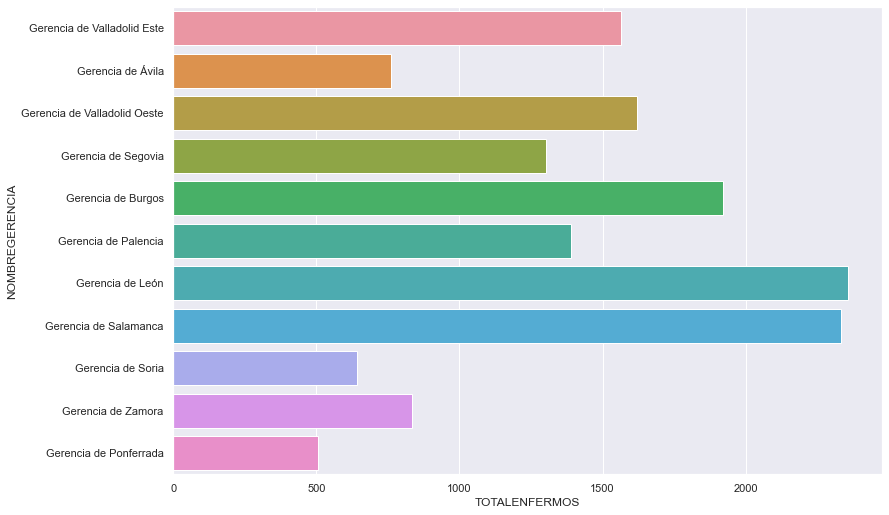

In [17]:
sns.barplot(data = sample_TEAAS
                ,x = "TOTALENFERMOS"
                ,estimator = sum,
                y = "NOMBREGERENCIA",
                ci = None,orient="h")


    ¿Por qué?
   
El sustantivo es información con características las cuales son las siguientes ,los datos no necesitan de transformaciones dado que el gráfico es claro y preciso ,por otro lado muestra el número total de enfermos que estuvieron en los centros de salud de las diferentes provincias ,así mismo se puede evidenciar que verbo es explorar y comparar las siguientes gerencias : León y Salamanca presentaron mayor número de enfermos  ,mientras que en la gerencia de Ponferrada es la que tiene menos número de enfermos.

    Marcas y Canales 

En la gráfica se observan dos variables con Marca de línea. La primera variable de categoría cuantitativa llamada: "nombre gerencia" que representa cada departamento del área de salud por provincia, estudiada en España. La segunda variable se nombra como "Total Enfermos" y representa la suma total de personas que llegan enfermas a los centros de salud de cada provincia, la variable "Total Enfermos" tiene canal de posición espacial horizontal muestras que la variable “Nombre Gerencia" tiene canal de posición espacial vertical. Finalizando, el atributo categórico de "Nombre Gerencia" presenta canal de color tipo arcoíris.


* Visualización #2 hecha por Natalia Pedraza Bastidas

In [18]:
TEAAS_Valladolid = TEAAS[TEAAS['PROVINCIA']=="Valladolid"]
v1=TEAAS_Valladolid['PCR_REALIZADOS'].sum()
v2=TEAAS_Valladolid['PCR_POSITIVOS'].sum()
TEAAS_Avila = TEAAS[TEAAS['PROVINCIA']=="Ávila"]
a1=TEAAS_Avila['PCR_REALIZADOS'].sum()
a2=TEAAS_Avila['PCR_POSITIVOS'].sum()
TEAAS_Segovia = TEAAS[TEAAS['PROVINCIA']=="Segovia"]
s1=TEAAS_Segovia['PCR_REALIZADOS'].sum()
s2=TEAAS_Segovia['PCR_POSITIVOS'].sum()
TEAAS_Burgos = TEAAS[TEAAS['PROVINCIA']=="Burgos"]
b1=TEAAS_Burgos['PCR_REALIZADOS'].sum()
b2=TEAAS_Burgos['PCR_POSITIVOS'].sum()
TEAAS_Palencia = TEAAS[TEAAS['PROVINCIA']=="Palencia"]
p1=TEAAS_Palencia['PCR_REALIZADOS'].sum()
p2=TEAAS_Palencia['PCR_POSITIVOS'].sum()
TEAAS_Leon = TEAAS[TEAAS['PROVINCIA']=="León"]
l1=TEAAS_Leon['PCR_REALIZADOS'].sum()
l2=TEAAS_Leon['PCR_POSITIVOS'].sum()
TEAAS_Salamanca = TEAAS[TEAAS['PROVINCIA']=="Salamanca"]
sa1=TEAAS_Salamanca['PCR_REALIZADOS'].sum()
sa2=TEAAS_Salamanca['PCR_POSITIVOS'].sum()
TEAAS_Soria = TEAAS[TEAAS['PROVINCIA']=="Soria"]
so1=TEAAS_Soria['PCR_REALIZADOS'].sum()
so2=TEAAS_Soria['PCR_POSITIVOS'].sum()
TEAAS_Zamora = TEAAS[TEAAS['PROVINCIA']=="Zamora"]
z1=TEAAS_Zamora['PCR_REALIZADOS'].sum()
z2=TEAAS_Zamora['PCR_POSITIVOS'].sum()

In [19]:
realizada=(v1, a1, s1, b1, p1, l1, sa1, so1, z1)
realizada

(13221, 2887, 5689, 6187, 5014, 13265, 8072, 2674, 3356)

In [20]:
positiva=(v2, a2, s2, b2, p2, l2, sa2, so2, z2)
positiva

(2541, 563, 690, 1362, 1130, 2191, 1422, 465, 560)

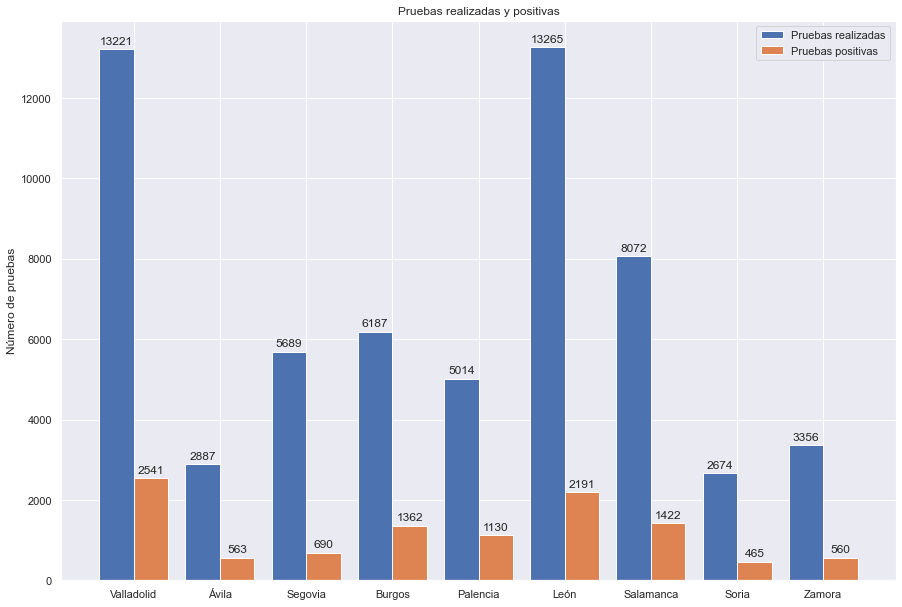

In [21]:
Provincia = ['Valladolid', 'Ávila', 'Segovia', 'Burgos', 'Palencia', 'León', 'Salamanca', 'Soria', 'Zamora']

x = np.arange(len(Provincia))
#tamaño de cada barra
width = 0.4
 
fig, ax = plt.subplots()
 
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, realizada, width, label='Pruebas realizadas')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, positiva, width, label='Pruebas positivas')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Número de pruebas')
ax.set_title('Pruebas realizadas y positivas')
ax.set_xticks(x)
ax.set_xticklabels(Provincia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()
 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
plt.show()


    ¿Por qué?

Con la gráfica se presenta la diferencia entre el número de pruebas PSC realizadas y las pruebas PCS que resultaron positivas en las diferentes provincias de Castilla y León, así  comparar las proporciones de estas los categorías. también se puede ver la similitud entre el conteo de pruebas, tanto realizadas como positivas de las provincias.

    ¿Cómo?
     
Se utilizó un modismo de gráfico de barras, comparando la suma de las pruebas PCR realizadas en cada provincia con dos atributos cuantitativos y un atributo categórico clave, es un gráfico de barras alineado para poder comparar más claramente. 

Las marcas de este modismo son líneas que están representadas en barras horizontales usadas para mostrar el conteo de pruebas de las dos variables mostradas en la gráfica.
Los canales usados son:

* Canal de posición espacial vertical para los dos atributos cuantitativos que son las pruebas PCR realizadas y las pruebas PCR positivas.

* Canal de posición espacial horizontal para el atributo categórico de las provincias.

* Canal de color para las dos variables ordenadas cuantitativas, azul para las pruebas realizadas y naranja para las pruebas positivas.



* Visualización #3 hecha por Laura Daniela Hurtado

In [22]:
TEAAS["PROVINCIA"].value_counts()

Valladolid    829
León          806
Salamanca     737
Burgos        705
Palencia      446
Ávila         439
Zamora        423
Segovia       337
Soria         278
Name: PROVINCIA, dtype: int64

In [23]:
TEAAS["TIPO_CENTRO"].value_counts()

Rural     3709
Urbano    1291
Name: TIPO_CENTRO, dtype: int64

In [24]:
tab = pd.crosstab(TEAAS["TIPO_CENTRO"],TEAAS["PROVINCIA"])
tab

PROVINCIA,Burgos,León,Palencia,Salamanca,Segovia,Soria,Valladolid,Zamora,Ávila
TIPO_CENTRO,,,,,,,,,
Rural,497,679,345,529,286,237,437,341,358
Urbano,208,127,101,208,51,41,392,82,81


Text(90.8, 0.5, 'Tipo Centro')

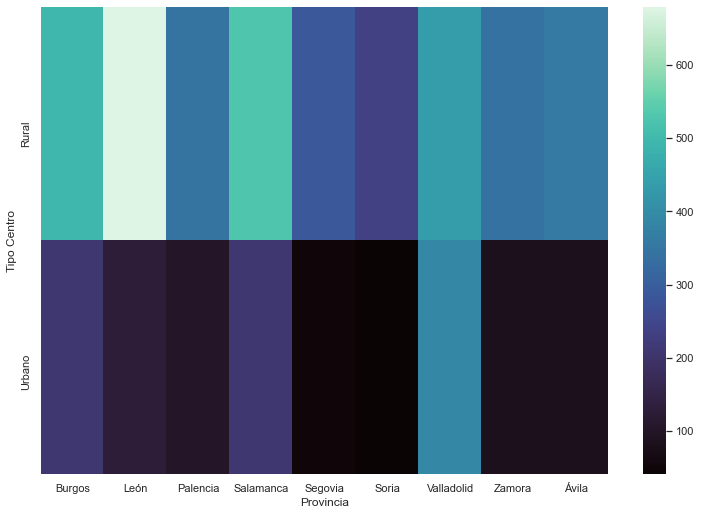

In [25]:
ax = sns.heatmap(tab, cmap="mako"),plt.xlabel('Provincia'),
plt.ylabel('Tipo Centro')

    ¿Por qué?
    
La tarea que se requiere es analizar y presentar los tipos de centro en cada provincia, además tiene como objetivo comparar la cantidad de centros urbanos y rurales que hay por cada provincia. 


    ¿Cómo?
    
Para este tipo de datos que se van a graficar, debido a que en la gráfica no tienen ninguna diferencia en cuanto a tamaño, la mejor forma de presentarlos es mediante en mapa de calor y en el incluir la saturación de color. La marca que se utilizo fue la de área, aunque todos los rectángulos son del mismo tamaño y el canal fue el de la saturación de color para indicar en cuales provincias se encuentra la mayor cantidad de centros, ya sean urbanos o rurales
